In [1]:
import N_Game_func
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sklearn as sk
from keras.optimizers import Adam

W0925 16:11:34.692045 10192 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  
Using TensorFlow backend.


# Create Training/Testing Data

In [2]:
img_path = r"C:\Users\Jordan\Desktop\N_game_images"

In [3]:
labels,merged_labels = N_Game_func.original_labels(img_path)

In [4]:
N_Game_func.data_generator(img_path+'\\originals')

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.93it/s]


In [5]:
train_data,train_labels = N_Game_func.create_train_data(img_path+'\\originals_rotated\\',labels,img_size=60)

train_data,train_labels= sk.utils.shuffle(train_data,train_labels)

100%|██████████████████████████████████████████████████████████████████████████████| 180/180 [00:00<00:00, 3222.78it/s]


In [6]:
test_data, test_labels = N_Game_func.process_test_data(img_path+'\\originals\\',labels,img_size=60)
test_data,test_labels= sk.utils.shuffle(test_data,test_labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 2508.86it/s]


In [7]:
#if using data generator
data_gen = ImageDataGenerator(rescale=1/255.,rotation_range=0, width_shift_range=0.8,
                         height_shift_range=0.8, zoom_range=0.5,horizontal_flip=True,validation_split=0.2)

test_gen = ImageDataGenerator()

training_batchSize = 1
testing_batchSize = 1
train_gen = data_gen.flow(train_data, train_labels, batch_size = training_batchSize, subset='training')
val_gen = data_gen.flow(train_data, train_labels, batch_size=training_batchSize, subset='validation')
test_gen= test_gen.flow(test_data, test_labels, batch_size=testing_batchSize)

# Use Custom Network Model (Accuracy Sucks)

In [14]:
custom_VG, custom_VG_name = N_Game_func.create_ownVGG16(train_data,num_output=len(merged_labels),learn_rate=1e-3)

W0924 13:09:45.077837 17208 module_wrapper.py:137] From C:\Users\Jordan\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [73]:
train_gen.reset()
val_gen.reset()
traind_VGG = N_Game_func.train_model(custom_VG,img_path+'\\models\\'+custom_VG_name,checkpoint_dir=img_path+'\\check_points\\',
                                      num_ep=10,train_data=True,use_generator=True,train_generator=train_gen,
                                      validation_generator=val_gen, gen_trainSamples=np.ceil(train_gen.n/train_gen.batch_size),
                                     gen_valSamples=np.ceil(val_gen.n/val_gen.batch_size))

No version of model found, proceeding to train new model from scratch...
Epoch 1/10
144/144 [==============================] - ETA: 1:56 - loss: 1.6094 - acc: 0.0000e+00 - ETA: 1:19 - loss: 1.6157 - acc: 0.0000e+00 - ETA: 1:06 - loss: 1.5873 - acc: 0.3333     - ETA: 1:00 - loss: 1.6089 - acc: 0.2500 - ETA: 57s - loss: 1.6278 - acc: 0.2000  - ETA: 54s - loss: 1.6159 - acc: 0.1667 - ETA: 52s - loss: 1.6265 - acc: 0.1429 - ETA: 50s - loss: 1.6317 - acc: 0.1250 - ETA: 49s - loss: 1.6523 - acc: 0.1111 - ETA: 48s - loss: 1.6542 - acc: 0.1000 - ETA: 47s - loss: 1.6387 - acc: 0.1818 - ETA: 46s - loss: 1.6534 - acc: 0.1667 - ETA: 45s - loss: 1.6474 - acc: 0.1538 - ETA: 45s - loss: 1.6364 - acc: 0.2143 - ETA: 44s - loss: 1.6466 - acc: 0.2000 - ETA: 43s - loss: 1.6366 - acc: 0.2500 - ETA: 43s - loss: 1.6441 - acc: 0.2353 - ETA: 42s - loss: 1.6495 - acc: 0.2222 - ETA: 42s - loss: 1.6491 - acc: 0.2105 - ETA: 41s - loss: 1.6437 - acc: 0.2000 - ETA: 41s - loss: 1.6483 - acc: 0.1905 - ETA: 40s - loss:

144/144 [==============================] - ETA: 44s - loss: 1.6011 - acc: 0.0000e+00 - ETA: 43s - loss: 1.6203 - acc: 0.0000e+00 - ETA: 42s - loss: 1.5620 - acc: 0.3333     - ETA: 43s - loss: 1.5295 - acc: 0.5000 - ETA: 42s - loss: 1.5804 - acc: 0.4000 - ETA: 42s - loss: 1.5934 - acc: 0.3333 - ETA: 42s - loss: 1.5963 - acc: 0.2857 - ETA: 41s - loss: 1.6047 - acc: 0.2500 - ETA: 41s - loss: 1.6271 - acc: 0.2222 - ETA: 41s - loss: 1.6024 - acc: 0.3000 - ETA: 41s - loss: 1.6036 - acc: 0.2727 - ETA: 40s - loss: 1.6044 - acc: 0.2500 - ETA: 40s - loss: 1.6200 - acc: 0.2308 - ETA: 40s - loss: 1.6184 - acc: 0.2143 - ETA: 39s - loss: 1.6215 - acc: 0.2000 - ETA: 39s - loss: 1.6240 - acc: 0.1875 - ETA: 39s - loss: 1.6102 - acc: 0.2353 - ETA: 38s - loss: 1.5979 - acc: 0.2778 - ETA: 38s - loss: 1.6004 - acc: 0.2632 - ETA: 38s - loss: 1.6066 - acc: 0.2500 - ETA: 38s - loss: 1.6044 - acc: 0.2381 - ETA: 37s - loss: 1.6102 - acc: 0.2273 - ETA: 37s - loss: 1.6154 - acc: 0.2174 - ETA: 37s - loss: 1.6060 -

144/144 [==============================] - ETA: 43s - loss: 1.5811 - acc: 0.0000e+00 - ETA: 43s - loss: 1.6431 - acc: 0.0000e+00 - ETA: 44s - loss: 1.6201 - acc: 0.0000e+00 - ETA: 43s - loss: 1.6249 - acc: 0.0000e+00 - ETA: 43s - loss: 1.6387 - acc: 0.0000e+00 - ETA: 43s - loss: 1.6395 - acc: 0.0000e+00 - ETA: 42s - loss: 1.6298 - acc: 0.0000e+00 - ETA: 42s - loss: 1.6225 - acc: 0.0000e+00 - ETA: 42s - loss: 1.6228 - acc: 0.0000e+00 - ETA: 41s - loss: 1.6225 - acc: 0.0000e+00 - ETA: 41s - loss: 1.6209 - acc: 0.0000e+00 - ETA: 41s - loss: 1.6196 - acc: 0.0000e+00 - ETA: 41s - loss: 1.6180 - acc: 0.0000e+00 - ETA: 40s - loss: 1.6168 - acc: 0.0000e+00 - ETA: 40s - loss: 1.6152 - acc: 0.0000e+00 - ETA: 40s - loss: 1.6143 - acc: 0.0000e+00 - ETA: 39s - loss: 1.6169 - acc: 0.0000e+00 - ETA: 39s - loss: 1.6158 - acc: 0.0000e+00 - ETA: 39s - loss: 1.6147 - acc: 0.0000e+00 - ETA: 38s - loss: 1.6174 - acc: 0.0000e+00 - ETA: 38s - loss: 1.6151 - acc: 0.0476     - ETA: 38s - loss: 1.6130 - acc: 0.

144/144 [==============================] - ETA: 41s - loss: 1.8930 - acc: 0.0000e+00 - ETA: 41s - loss: 1.8146 - acc: 0.0000e+00 - ETA: 42s - loss: 1.6808 - acc: 0.3333     - ETA: 42s - loss: 1.6097 - acc: 0.5000 - ETA: 42s - loss: 1.6097 - acc: 0.4000 - ETA: 42s - loss: 1.6332 - acc: 0.3333 - ETA: 41s - loss: 1.6165 - acc: 0.2857 - ETA: 41s - loss: 1.6327 - acc: 0.2500 - ETA: 41s - loss: 1.5982 - acc: 0.3333 - ETA: 40s - loss: 1.6358 - acc: 0.3000 - ETA: 40s - loss: 1.6053 - acc: 0.3636 - ETA: 40s - loss: 1.6086 - acc: 0.3333 - ETA: 40s - loss: 1.6174 - acc: 0.3077 - ETA: 40s - loss: 1.6242 - acc: 0.2857 - ETA: 39s - loss: 1.6217 - acc: 0.2667 - ETA: 39s - loss: 1.6441 - acc: 0.2500 - ETA: 39s - loss: 1.6231 - acc: 0.2941 - ETA: 38s - loss: 1.6250 - acc: 0.2778 - ETA: 38s - loss: 1.6259 - acc: 0.2632 - ETA: 38s - loss: 1.6253 - acc: 0.2500 - ETA: 37s - loss: 1.6402 - acc: 0.2381 - ETA: 37s - loss: 1.6424 - acc: 0.2273 - ETA: 37s - loss: 1.6411 - acc: 0.2174 - ETA: 36s - loss: 1.6510 -

144/144 [==============================] - ETA: 44s - loss: 1.5984 - acc: 0.0000e+00 - ETA: 43s - loss: 1.5270 - acc: 0.5000     - ETA: 43s - loss: 1.5502 - acc: 0.3333 - ETA: 42s - loss: 1.5944 - acc: 0.2500 - ETA: 42s - loss: 1.5947 - acc: 0.2000 - ETA: 42s - loss: 1.6114 - acc: 0.1667 - ETA: 42s - loss: 1.5892 - acc: 0.2857 - ETA: 41s - loss: 1.5902 - acc: 0.2500 - ETA: 41s - loss: 1.6054 - acc: 0.2222 - ETA: 41s - loss: 1.6144 - acc: 0.2000 - ETA: 41s - loss: 1.6126 - acc: 0.1818 - ETA: 40s - loss: 1.6111 - acc: 0.1667 - ETA: 40s - loss: 1.6101 - acc: 0.1538 - ETA: 40s - loss: 1.6089 - acc: 0.1429 - ETA: 39s - loss: 1.6167 - acc: 0.1333 - ETA: 39s - loss: 1.6069 - acc: 0.1875 - ETA: 39s - loss: 1.5982 - acc: 0.2353 - ETA: 39s - loss: 1.6036 - acc: 0.2222 - ETA: 38s - loss: 1.5960 - acc: 0.2632 - ETA: 38s - loss: 1.6010 - acc: 0.2500 - ETA: 38s - loss: 1.6005 - acc: 0.2381 - ETA: 37s - loss: 1.6001 - acc: 0.2273 - ETA: 37s - loss: 1.6042 - acc: 0.2174 - ETA: 37s - loss: 1.6080 - acc

In [ ]:
#model,model_name = N_Game_func.create_CNN(img_data,cnn_nodes=32,output_nodes=len(merged_labels),
                                          #hidden_layers=3,learn_rate=1e-3)

In [ ]:
#traind_model = N_Game_func.train_model(model,img_path+'\\models\\'+model_name,checkpoint_dir=img_path+'\\check_points\\',
                                      #num_ep=5,use_generator=True,train_generator=train_gen,
                                      #validation_generator=val_gen)

In [60]:
test_loss,test_acc = traind_VGG.evaluate(test_data/255., y=np.array(test_labels),verbose=1)

5/5 [==============================] - 1s 119ms/step


In [61]:
print('Test acc:',test_acc*100,'%')

Test acc: 40.00000059604645 %


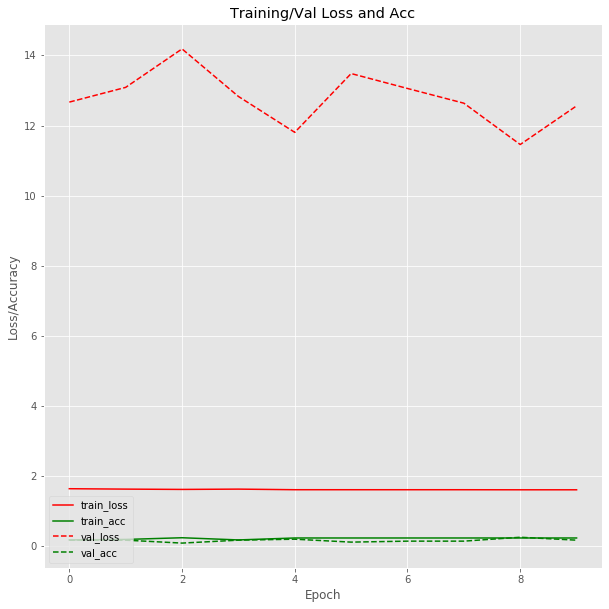

In [62]:
N_Game_func.custom_results_plot(traind_VGG)

In [63]:
predictions = traind_VGG.predict(test_data/255.)

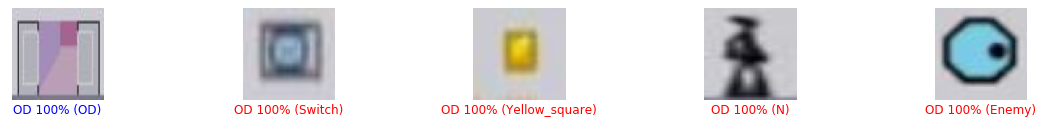

In [64]:
plt_imgs = test_data.astype('uint8')
num_rows = 6
num_cols = 5
num_images = len(test_labels)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cv2.cvtColor(plt_imgs[i], cv2.COLOR_BGR2RGB))
    
    predicted_lab = np.argmax(predictions[i])
    if predicted_lab == np.argmax(test_labels[i]):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(merged_labels[predicted_lab],100*np.max(predictions[i]),
                                         merged_labels[np.argmax(test_labels[i])]),
               color=color)
    
    
    #plot_image(i, predictions, testing_labels, testing_data)
plt.show()

# Use pre-trained VGG16

In [21]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [25]:
freezeLast = -3
preTrained_model = N_Game_func.preCreated_VGG(train_data[0].shape,len(merged_labels),
                                              pre_trained=True,include_topLayers=False,freezeLayers=freezeLast)
model_name = 'preTrained_VGG_trainLast'+str(freezeLast*-1)+'.h5'

C:\Users\Jordan\Python_Files\N_Game_func.py:324: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`
  my_model = Model(input=input_tensor, output=x)


In [18]:
# freeze more layers of VGG 
preTrained_model.load_weights(img_path+'\\check_points\\preTrained_VGG_trainLast3_Generator_weights-improvement-35-0.75.hdf5')
x = preTrained_model.layers[1]
for layer in x.layers[:-2]:
    layer.trainable = False
for layer in x.layers:
    print(layer,layer.trainable)
preTrained_model.layers[1] = x

<keras.engine.input_layer.InputLayer object at 0x000001FE352665F8> False
<keras.layers.convolutional.Conv2D object at 0x000001FE35266438> False
<keras.layers.convolutional.Conv2D object at 0x000001FE35266CC0> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FE350425C0> False
<keras.layers.convolutional.Conv2D object at 0x000001FE350508D0> False
<keras.layers.convolutional.Conv2D object at 0x000001FE35050F28> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FE35062518> False
<keras.layers.convolutional.Conv2D object at 0x000001FE3506CE80> False
<keras.layers.convolutional.Conv2D object at 0x000001FE3506F6D8> False
<keras.layers.convolutional.Conv2D object at 0x000001FE3507C5F8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FE3507FE48> False
<keras.layers.convolutional.Conv2D object at 0x000001FE35094CF8> False
<keras.layers.convolutional.Conv2D object at 0x000001FE350A2550> False
<keras.layers.convolutional.Conv2D object at 0x000001FE350A9438> False
<ker

In [26]:
preTrained_model.compile(optimizer=Adam(lr=1e-7),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=round(5*.75), verbose=1, 
                                              mode='auto', baseline=None, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-6)
cbs=[early_stop,reduce_lr]

In [14]:
history=preTrained_model.fit_generator(train_gen,epochs=5,initial_epoch=31,
                                 steps_per_epoch= np.ceil(train_gen.n/train_gen.batch_size),
                                 validation_data = val_gen,
                                 validation_steps = np.ceil(val_gen.n/val_gen.batch_size),
                                 verbose=1,callbacks=cbs)

W0925 16:13:07.055202 10192 deprecation.py:323] From C:\Users\Jordan\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
history = N_Game_func.train_model(preTrained_model,img_path+'\\models\\'+model_name,checkpoint_dir=img_path+'\\check_points\\',
                                      num_ep=10,train_data=True,use_generator=True,train_generator=train_gen,
                                      validation_generator=val_gen, gen_trainSamples=np.ceil(train_gen.n/train_gen.batch_size),
                                     gen_valSamples=np.ceil(val_gen.n/val_gen.batch_size))
train_gen.reset()
val_gen.reset()

Weights loaded!
Epoch 29/38
144/144 [==============================] - ETA: 1:05 - loss: 0.0366 - acc: 1.0000 - ETA: 56s - loss: 0.6582 - acc: 1.0000  - ETA: 53s - loss: 0.9846 - acc: 0.6667 - ETA: 51s - loss: 0.7386 - acc: 0.7500 - ETA: 51s - loss: 0.9325 - acc: 0.6000 - ETA: 50s - loss: 0.7784 - acc: 0.6667 - ETA: 49s - loss: 0.9065 - acc: 0.5714 - ETA: 49s - loss: 0.7932 - acc: 0.6250 - ETA: 48s - loss: 0.8764 - acc: 0.5556 - ETA: 48s - loss: 0.7888 - acc: 0.6000 - ETA: 48s - loss: 0.7619 - acc: 0.6364 - ETA: 47s - loss: 0.7780 - acc: 0.6667 - ETA: 47s - loss: 0.8015 - acc: 0.6923 - ETA: 46s - loss: 0.8596 - acc: 0.6429 - ETA: 46s - loss: 0.8317 - acc: 0.6667 - ETA: 46s - loss: 0.7797 - acc: 0.6875 - ETA: 45s - loss: 0.8292 - acc: 0.6471 - ETA: 45s - loss: 0.7833 - acc: 0.6667 - ETA: 45s - loss: 0.7421 - acc: 0.6842 - ETA: 44s - loss: 0.7915 - acc: 0.6500 - ETA: 44s - loss: 0.8186 - acc: 0.6190 - ETA: 43s - loss: 0.8740 - acc: 0.5909 - ETA: 43s - loss: 0.9589 - acc: 0.5652 - ETA: 43

144/144 [==============================] - ETA: 48s - loss: 0.5784 - acc: 1.0000 - ETA: 48s - loss: 0.2892 - acc: 1.0000 - ETA: 48s - loss: 0.1928 - acc: 1.0000 - ETA: 48s - loss: 0.3043 - acc: 1.0000 - ETA: 48s - loss: 0.2435 - acc: 1.0000 - ETA: 48s - loss: 0.4339 - acc: 0.8333 - ETA: 48s - loss: 0.6474 - acc: 0.7143 - ETA: 47s - loss: 0.6814 - acc: 0.7500 - ETA: 47s - loss: 0.7568 - acc: 0.6667 - ETA: 47s - loss: 0.7345 - acc: 0.7000 - ETA: 46s - loss: 0.7050 - acc: 0.7273 - ETA: 46s - loss: 0.7862 - acc: 0.6667 - ETA: 46s - loss: 0.8406 - acc: 0.6154 - ETA: 46s - loss: 0.8950 - acc: 0.5714 - ETA: 45s - loss: 0.8368 - acc: 0.6000 - ETA: 45s - loss: 0.8062 - acc: 0.6250 - ETA: 45s - loss: 0.7588 - acc: 0.6471 - ETA: 44s - loss: 0.7167 - acc: 0.6667 - ETA: 44s - loss: 0.8517 - acc: 0.6316 - ETA: 44s - loss: 0.8153 - acc: 0.6500 - ETA: 44s - loss: 0.8589 - acc: 0.6190 - ETA: 43s - loss: 0.8582 - acc: 0.6364 - ETA: 43s - loss: 0.8368 - acc: 0.6522 - ETA: 43s - loss: 0.8468 - acc: 0.6667

144/144 [==============================] - ETA: 47s - loss: 1.1921e-07 - acc: 1.0000 - ETA: 48s - loss: 0.9192 - acc: 0.5000     - ETA: 47s - loss: 0.6145 - acc: 0.6667 - ETA: 48s - loss: 0.5146 - acc: 0.7500 - ETA: 48s - loss: 0.4154 - acc: 0.8000 - ETA: 48s - loss: 0.4918 - acc: 0.6667 - ETA: 48s - loss: 0.4270 - acc: 0.7143 - ETA: 48s - loss: 0.3736 - acc: 0.7500 - ETA: 47s - loss: 0.3323 - acc: 0.7778 - ETA: 47s - loss: 0.4140 - acc: 0.8000 - ETA: 47s - loss: 0.3795 - acc: 0.8182 - ETA: 46s - loss: 0.4875 - acc: 0.7500 - ETA: 46s - loss: 0.6236 - acc: 0.6923 - ETA: 46s - loss: 0.7062 - acc: 0.6429 - ETA: 45s - loss: 0.7720 - acc: 0.6000 - ETA: 45s - loss: 0.8318 - acc: 0.5625 - ETA: 45s - loss: 0.8990 - acc: 0.5294 - ETA: 44s - loss: 0.8556 - acc: 0.5556 - ETA: 44s - loss: 0.8720 - acc: 0.5789 - ETA: 44s - loss: 0.8284 - acc: 0.6000 - ETA: 43s - loss: 0.8526 - acc: 0.6190 - ETA: 43s - loss: 0.8871 - acc: 0.5909 - ETA: 43s - loss: 0.9224 - acc: 0.5652 - ETA: 42s - loss: 0.9526 - acc

144/144 [==============================] - ETA: 49s - loss: 0.4268 - acc: 1.0000 - ETA: 49s - loss: 0.2134 - acc: 1.0000 - ETA: 49s - loss: 0.4992 - acc: 1.0000 - ETA: 49s - loss: 0.7379 - acc: 1.0000 - ETA: 49s - loss: 0.7232 - acc: 1.0000 - ETA: 49s - loss: 0.6331 - acc: 1.0000 - ETA: 49s - loss: 0.8585 - acc: 0.8571 - ETA: 48s - loss: 1.0261 - acc: 0.7500 - ETA: 48s - loss: 1.0609 - acc: 0.6667 - ETA: 48s - loss: 1.0937 - acc: 0.7000 - ETA: 47s - loss: 1.1562 - acc: 0.6364 - ETA: 47s - loss: 1.0605 - acc: 0.6667 - ETA: 47s - loss: 1.0739 - acc: 0.6923 - ETA: 47s - loss: 0.9972 - acc: 0.7143 - ETA: 46s - loss: 0.9963 - acc: 0.6667 - ETA: 46s - loss: 0.9340 - acc: 0.6875 - ETA: 46s - loss: 1.0110 - acc: 0.6471 - ETA: 45s - loss: 1.0430 - acc: 0.6111 - ETA: 45s - loss: 1.0808 - acc: 0.5789 - ETA: 45s - loss: 1.0270 - acc: 0.6000 - ETA: 44s - loss: 1.0519 - acc: 0.5714 - ETA: 44s - loss: 1.0272 - acc: 0.5909 - ETA: 44s - loss: 1.0255 - acc: 0.6087 - ETA: 44s - loss: 1.0155 - acc: 0.6250

144/144 [==============================] - ETA: 47s - loss: 1.7187 - acc: 0.0000e+00 - ETA: 48s - loss: 0.8594 - acc: 0.5000     - ETA: 49s - loss: 0.6692 - acc: 0.6667 - ETA: 49s - loss: 0.5195 - acc: 0.7500 - ETA: 49s - loss: 0.4156 - acc: 0.8000 - ETA: 49s - loss: 0.6169 - acc: 0.6667 - ETA: 48s - loss: 0.5288 - acc: 0.7143 - ETA: 48s - loss: 0.7373 - acc: 0.6250 - ETA: 48s - loss: 0.7116 - acc: 0.6667 - ETA: 47s - loss: 0.6405 - acc: 0.7000 - ETA: 47s - loss: 0.5823 - acc: 0.7273 - ETA: 47s - loss: 0.7270 - acc: 0.6667 - ETA: 46s - loss: 0.7147 - acc: 0.6923 - ETA: 46s - loss: 0.7946 - acc: 0.6429 - ETA: 46s - loss: 0.8594 - acc: 0.6000 - ETA: 45s - loss: 0.8072 - acc: 0.6250 - ETA: 45s - loss: 0.8548 - acc: 0.5882 - ETA: 45s - loss: 0.8814 - acc: 0.6111 - ETA: 44s - loss: 0.8363 - acc: 0.6316 - ETA: 44s - loss: 0.7945 - acc: 0.6500 - ETA: 44s - loss: 0.7659 - acc: 0.6667 - ETA: 43s - loss: 0.7311 - acc: 0.6818 - ETA: 43s - loss: 0.7853 - acc: 0.6522 - ETA: 43s - loss: 0.7883 - acc

In [28]:
test_loss,test_acc = preTrained_model.evaluate(test_data/255., y=np.array(test_labels),verbose=1)

5/5 [==============================] - 0s 14ms/step


In [29]:
print('Test acc:',test_acc*100,'%')

Test acc: 100.0 %


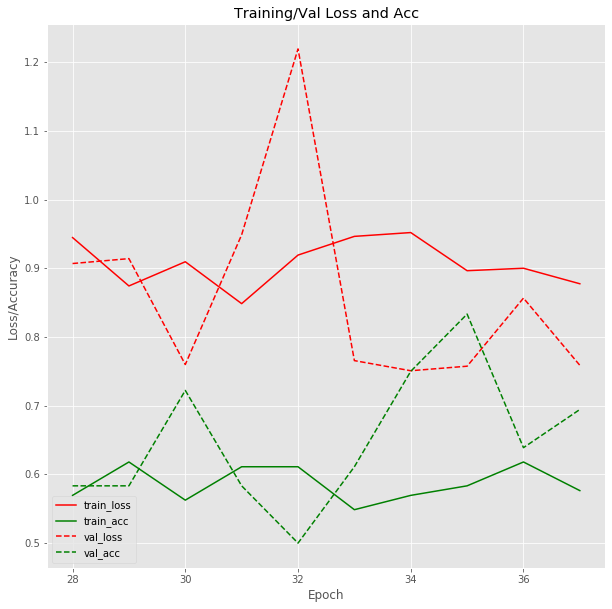

In [30]:
N_Game_func.custom_results_plot(history)

In [31]:
predictions = preTrained_model.predict(test_data/255.)

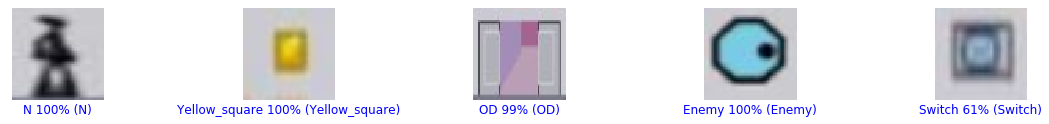

In [32]:
plt_imgs = test_data.astype('uint8')
num_rows = 6
num_cols = 5
num_images = len(test_labels)

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cv2.cvtColor(plt_imgs[i], cv2.COLOR_BGR2RGB))
    
    predicted_lab = np.argmax(predictions[i])
    if predicted_lab == np.argmax(test_labels[i]):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(merged_labels[predicted_lab],100*np.max(predictions[i]),
                                         merged_labels[np.argmax(test_labels[i])]),
               color=color)
    
    
    #plot_image(i, predictions, testing_labels, testing_data)
plt.show()